In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
# Load movie ratings data (small set)
df_movies = pd.read_csv('ml-latest-small/movies.csv')
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_tags = pd.read_csv('ml-latest-small/tags.csv')
df_links = pd.read_csv('ml-latest-small/links.csv')

data=pd.merge(df_ratings,df_movies,on='movieId')
sim_data = pd.read_csv('ml-latest-small/simulated_movie_user_data.csv')
sim_data_simple_small = pd.read_csv('ml-latest-small/simulated_movie_user_data_simple_small.csv')
sim_data_simple_large = pd.read_csv('ml-latest-small/simulated_movie_user_data_simple_large.csv')

In [24]:
#new column with mean rating per movie
def calculate_weighted_rank(data,m=100):
    data['av_rating']=data.groupby(['movieId'])['rating'].transform('mean')
#new column with number of ratings per movie
    data['no_of_ratings']=data.groupby(['movieId'])['rating'].transform('count')  
    # new column with ranking of movie according to weighted_rank()
    v = data['no_of_ratings']
    R = data['av_rating']
    C = data['rating'].mean()
    #m = 100.0 
    def weighted_rank(R, v, C, m):
        return R * v / (v+m) + C * m / (v+m)   
    data['weighted_rank']=weighted_rank(R,v,C,m) # use function from above as input for new column/variable
    return data
#df_ratings['weighted_rank']=R * v / (v+m) + C * m / (v+m) # using this would have the same result

In [64]:
data=calculate_weighted_rank(data,m=100)
sim_data=calculate_weighted_rank(sim_data,m=100)
sim_data_simple_small=calculate_weighted_rank(sim_data_simple_small,m=100)
sim_data_simple_large=calculate_weighted_rank(sim_data_simple_large,m=100)

In [65]:
k_origin=len(data['rating'])
k_simple_large=len(sim_data_simple_large)-k_origin
k_simple_small=len(sim_data_simple_small)-k_origin
k_sim=len(sim_data)-k_origin
k_origin, k_simple_small,k_sim, k_simple_large

(100836, 4243, 4927, 10201)

In [69]:
sim_data_new=sim_data[k_origin::]
sim_data_simple_small_new=sim_data_simple_small[k_origin::]
sim_data_simple_large_new=sim_data_simple_large[k_origin::]

In [120]:
data[['movieId','av_rating']].drop_duplicates('movieId')['av_rating']

0         3.920930
215       3.259615
267       3.946078
369       3.975369
572       4.237745
            ...   
100831    2.500000
100832    4.500000
100833    3.000000
100834    3.500000
100835    3.500000
Name: av_rating, Length: 9724, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


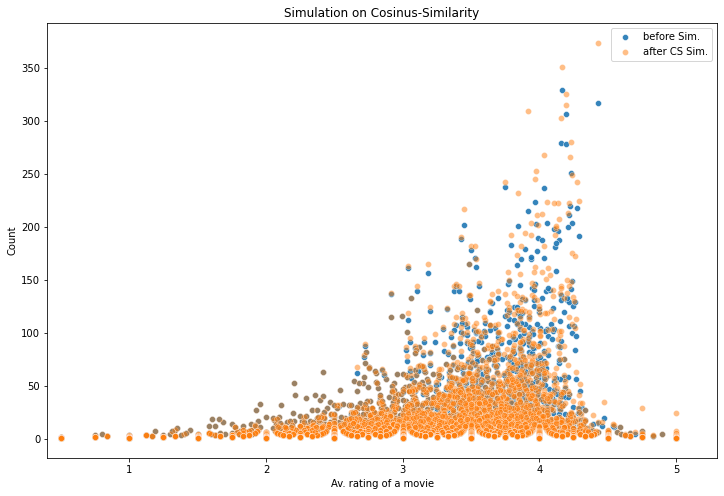

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(data[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],data[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.9)
sns.scatterplot(sim_data[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],sim_data[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.5)
names=['before Sim.','after CS Sim.']
plt.legend(labels=names)
plt.xlim(0.4,5.3)
plt.title('Simulation on Cosinus-Similarity')
plt.xlabel('Av. rating of a movie')
plt.ylabel('Count')
plt.savefig('Simulation_on_Cosinus-Similarity.png',dpi=300)
plt.show()
plt.close()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


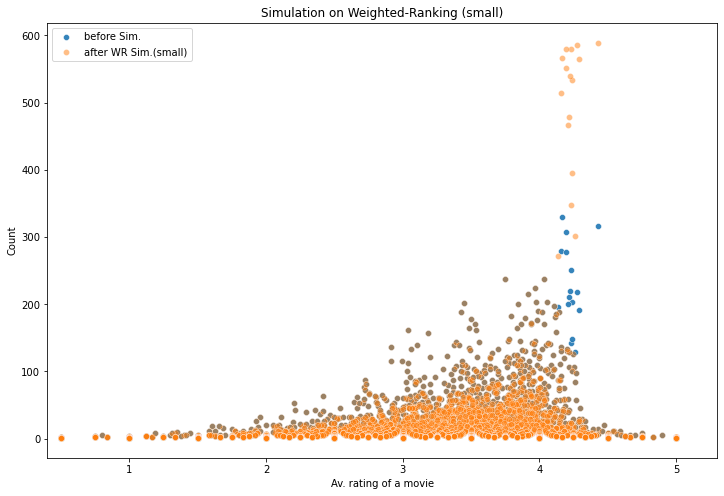

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


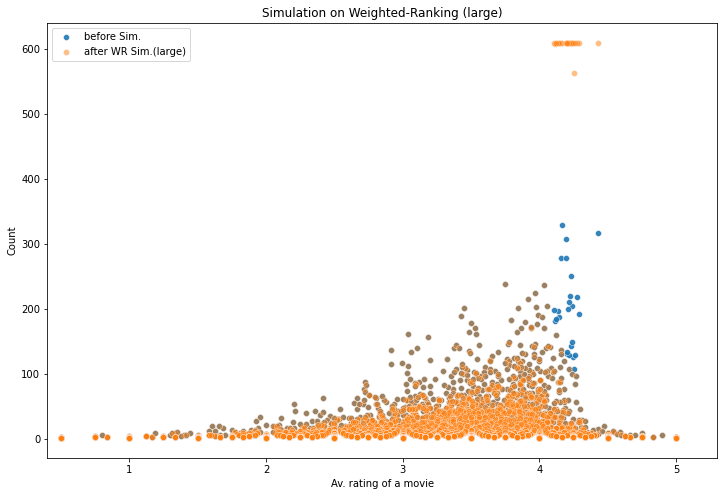

In [155]:
plt.figure(figsize=(12,8))
sns.scatterplot(data[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],data[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.9)
sns.scatterplot(sim_data_simple_small[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],sim_data_simple_small[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.5)

#sns.scatterplot(data['av_rating'],data['no_of_ratings'], alpha=0.5)
#sns.scatterplot(sim_data_simple_small['av_rating'],sim_data_simple_small['no_of_ratings'], alpha=0.5)
names=['before Sim.','after WR Sim.(small)']
plt.legend(labels=names)
plt.xlim(0.4,5.3)
plt.title('Simulation on Weighted-Ranking (small)')
plt.xlabel('Av. rating of a movie')
plt.ylabel('Count')
plt.savefig('Simulation_on_Weighted-Ranking_small.png',dpi=300)
plt.show()
plt.close()


plt.show()
plt.close()

plt.figure(figsize=(12,8))
sns.scatterplot(data[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],data[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.9)
sns.scatterplot(sim_data_simple_large[['movieId','av_rating']].drop_duplicates('movieId')['av_rating'],sim_data_simple_large[['movieId','no_of_ratings']].drop_duplicates('movieId')['no_of_ratings'],alpha=0.5)

#sns.scatterplot(data['av_rating'],data['no_of_ratings'], alpha=0.5)
#sns.scatterplot(sim_data_simple_large['av_rating'],sim_data_simple_large['no_of_ratings'], alpha=0.5)
names=['before Sim.','after WR Sim.(large)']
plt.xlim(0.4,5.3)
plt.legend(labels=names)
plt.title('Simulation on Weighted-Ranking (large)')
plt.xlabel('Av. rating of a movie')
plt.ylabel('Count')
plt.savefig('Simulation_on_Weighted-Ranking_large.png',dpi=300)

plt.show()
plt.close()

In [138]:
unique_CS=sim_data_new[['movieId','av_rating','no_of_ratings','weighted_rank']].drop_duplicates('movieId')
unique_WR_small=sim_data_simple_small_new[['movieId','av_rating','no_of_ratings','weighted_rank']].drop_duplicates('movieId')
unique_WR_large=sim_data_simple_large_new[['movieId','av_rating','no_of_ratings','weighted_rank']].drop_duplicates('movieId')


In [139]:
unique_CS.shape

(1060, 4)

In [140]:
unique_CS.to_csv('unique_CS.csv', sep=',', encoding='utf-8')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


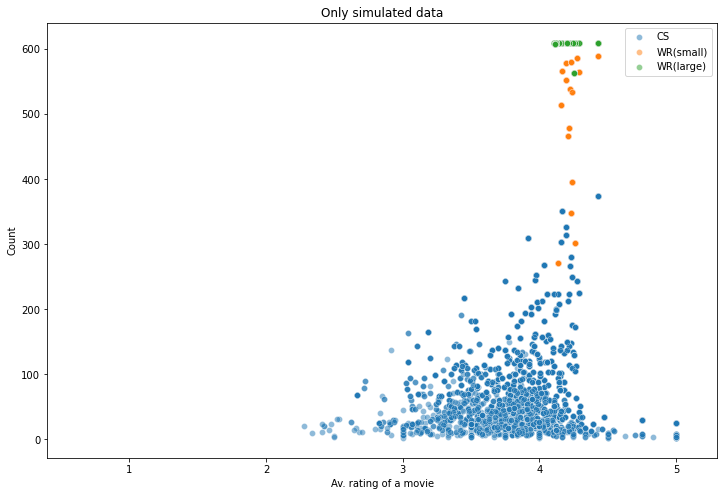

In [157]:
plt.figure(figsize=(12,8))
sns.scatterplot(sim_data_new['av_rating'],sim_data_new['no_of_ratings'], alpha=0.5)
sns.scatterplot(sim_data_simple_small_new['av_rating'],sim_data_simple_small_new['no_of_ratings'], alpha=0.5)
sns.scatterplot(sim_data_simple_large_new['av_rating'],sim_data_simple_large_new['no_of_ratings'], alpha=0.5)

names=['CS','WR(small)','WR(large)']
plt.legend(labels=names)
plt.xlim(0.4,5.3)
plt.title('Only simulated data')
plt.xlabel('Av. rating of a movie')
plt.ylabel('Count')
plt.savefig('Only simulated_data.png',dpi=300)


plt.show()
plt.close()